In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load both CSVs (headers already fixed)
cost_df = pd.read_csv("../outputs/attrition_cost_by_department.csv")   # columns: Department, Cost
leavers_df = pd.read_csv("../outputs/attrition_leavers.csv")           # columns: Department, Total_Leavers

# Merge them into one DataFrame
df = pd.merge(cost_df, leavers_df, on="Department")


📊 Plot 1: Attrition Cost by Department

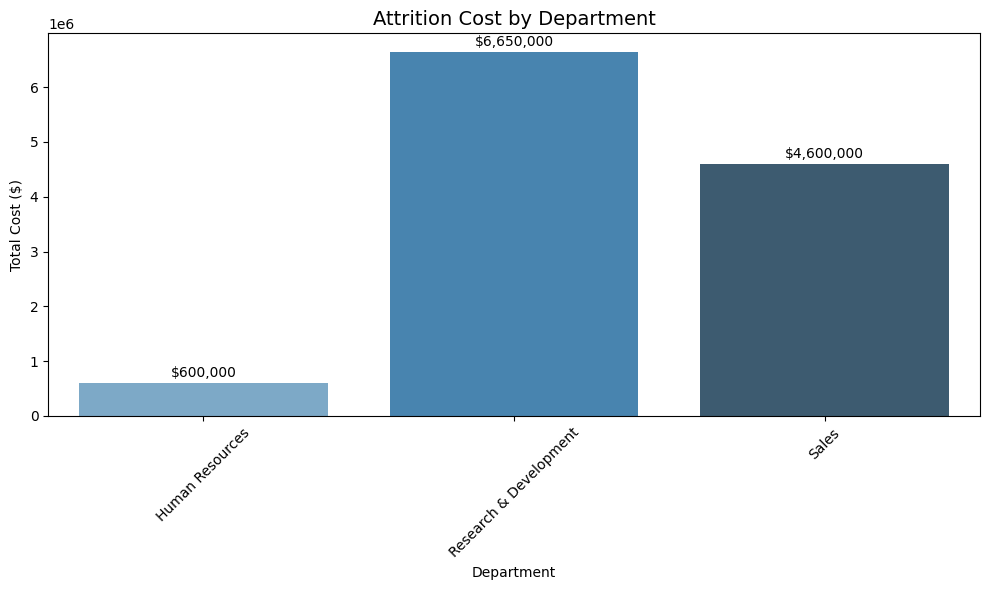

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Department', y='Cost', hue='Department', palette='Blues_d', legend=False)

plt.title('Attrition Cost by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Total Cost ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# 🏷️ Add formatted dollar value labels
for container in ax.containers:
    ax.bar_label(container, labels=[f"${int(v):,}" for v in container.datavalues], label_type='edge', padding=2)

# ✅ Save the chart as PNG
plt.savefig('../outputs/plot_attrition_cost.png', bbox_inches='tight')
plt.show()



📊 Plot 2: Number of Leavers by Department

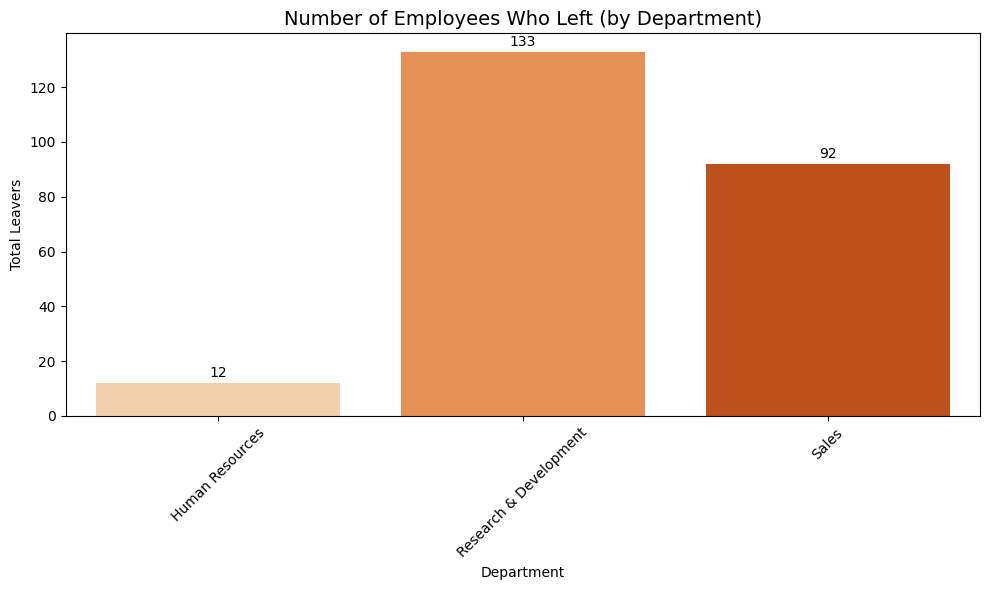

In [22]:
# Filter only employees who left
leavers = df[df["Attrition"] == "Yes"]

# Group and count by department
leavers_by_dept = leavers.groupby("Department").size().reset_index(name="Total_Leavers")

# Strip any white space (good habit)
leavers_by_dept.columns = leavers_by_dept.columns.str.strip()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=leavers_by_dept, x='Department', y='Total_Leavers', hue='Department', palette='Oranges', legend=False)

plt.title('Number of Employees Who Left (by Department)', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Total Leavers')
plt.xticks(rotation=45)
plt.tight_layout()

# 🏷️ Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.savefig('../outputs/plot_Number_of_Employees_Who_Left.png', bbox_inches='tight')

plt.show()

